In [21]:
# Dependencies and Setup

import geoplotlib
from geoplotlib.utils import read_csv, BoundingBox, DataAccessObject
from geoplotlib.colors import ColorMap
from geoplotlib.layers import GeoJSONLayer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [22]:
# load the data
weather = pd.read_csv("combined_data.csv")

coordinates = pd.read_csv("NC_Coordinate_Data.csv")
coordinates.rename(columns={'Latitude': 'lat', 'Longitude': 'lon'}, inplace=True)

In [23]:
# Combine the data into a single DataFrame
complete_dt_df = pd.merge(weather, coordinates, left_on="NC_ID", right_on="city_id")

# Delete duplicates columns
complete_dt_df = complete_dt_df.drop(["City", "city_id"], axis=1)

# Display the data table for preview
complete_dt_df.head()


,id,NC_ID,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,lat,lon
0,1,nc01,"asheville,NC",2023-01-01,62.8,40.3,48.1,62.8,40.3,48.1,...,10,2023-01-01T07:39:54,2023-01-01T17:27:50,0.32,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"72314453890,72315003812,F2588,99999953877,KAVL",35.5929,-82.557733
1,2,nc01,"asheville,NC",2023-01-02,65.3,40.4,49.0,65.3,40.4,48.9,...,10,2023-01-02T07:40:04,2023-01-02T17:28:37,0.35,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"72314453890,72315003812,F2588,99999953877,KAVL",35.5929,-82.557733
2,3,nc01,"asheville,NC",2023-01-03,64.0,49.4,57.5,64.0,49.4,57.5,...,10,2023-01-03T07:40:12,2023-01-03T17:29:25,0.39,"Rain, Overcast",Cloudy skies throughout the day with late afte...,rain,"72314453890,MAHN7,72315003812,F2588,9999995387...",35.5929,-82.557733
3,4,nc01,"asheville,NC",2023-01-04,60.6,42.3,54.8,60.6,40.2,54.7,...,10,2023-01-04T07:40:18,2023-01-04T17:30:14,0.42,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"72314453890,72315003812,F2588,99999953877,KAVL",35.5929,-82.557733
4,5,nc01,"asheville,NC",2023-01-05,58.2,32.8,44.8,58.2,32.8,44.0,...,10,2023-01-05T07:40:22,2023-01-05T17:31:04,0.46,"Snow, Rain",Clear conditions throughout the day with rain ...,rain,"72314453890,72315003812,F2588,99999953877,9999...",35.5929,-82.557733


In [69]:
# Creating POINT PLOT map to show the cities we have data available using geoplotlib

pointplot_df = coordinates[["City", "lat", "lon"]]
pointplot_df.head()

custom_color = [255, 0, 0, 128]
geoplotlib.dot(pointplot_df, point_size=8, color=custom_color )

# Adding text with a larger font size
#for i, row in pointplot_df.iterrows():
    #geoplotlib.text([row['lon'], row['lat']], row['name'], color='red', f_size=16)

# Display the plot
geoplotlib.show()

Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\envs\dev\lib\site-packages\geoplotlib\__init__.py", line 32, in _runapp
    app.start()
  File "c:\ProgramData\anaconda3\envs\dev\lib\site-packages\geoplotlib\core.py", line 369, in start
    pyglet.app.run()
  File "c:\ProgramData\anaconda3\envs\dev\lib\site-packages\pyglet\app\__init__.py", line 107, in run
    event_loop.run()
  File "c:\ProgramData\anaconda3\envs\dev\lib\site-packages\pyglet\app\base.py", line 169, in run
    timeout = self.idle()
  File "c:\ProgramData\anaconda3\envs\dev\lib\site-packages\pyglet\app\base.py", line 245, in idle
    window.dispatch_event('on_draw')
  File "c:\ProgramData\anaconda3\envs\dev\lib\site-packages\pyglet\window\__init__.py", line 1353, in dispatch_event
    if EventDispatcher.dispatch_event(self, *args) != False:
  File "c:\ProgramData\anaconda3\envs\dev\lib\site-packages\pyglet\event.py", line 415, in dispatch_event
    if getattr(self, event_type)(*args):
  File "c:\Prog

In [5]:
# Building the Heatmap using the geoplotlib

# Kernal Density Estimation
#geoplotlib.kde(heat_df, bw=6,cut_below=1e-5)

# create a map
#geoplotlib.set_bbox(BoundingBox.KBH)
#geoplotlib.show()

In [6]:
#PREPARING DATA FOR EACH SEASON OF THE YEAR

In [24]:
# WINTER - 2023


# Filter data by date interval - WINTER
winter_df = complete_dt_df[(complete_dt_df["datetime"] >= "2023-01-01") & (complete_dt_df["datetime"] <= "2023-03-19")]
winter_df.tail()

,id,NC_ID,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,lat,lon
4088,4089,nc12,"winston-salem, nc",2023-03-15,55.1,31.8,41.7,55.1,19.8,36.4,...,10,2023-03-15T07:32:00,2023-03-15T19:28:22,0.79,Clear,Clear conditions throughout the day.,clear-day,"72207953888,72317013723,KINT,0585W,72319393807...",36.100357,-80.246209
4089,4090,nc12,"winston-salem, nc",2023-03-16,65.0,31.9,50.2,65.0,31.9,49.5,...,10,2023-03-16T07:30:34,2023-03-16T19:29:14,0.82,Clear,Clear conditions throughout the day.,clear-day,"72207953888,72317013723,KINT,0585W,72319393807...",36.100357,-80.246209
4090,4091,nc12,"winston-salem, nc",2023-03-17,60.1,51.2,55.7,60.1,51.2,55.7,...,10,2023-03-17T07:29:08,2023-03-17T19:30:06,0.86,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"72207953888,72317013723,KINT,0585W,72319393807...",36.100357,-80.246209
4091,4092,nc12,"winston-salem, nc",2023-03-18,56.9,41.0,49.0,56.9,34.7,46.0,...,10,2023-03-18T07:27:41,2023-03-18T19:30:58,0.89,"Rain, Partially cloudy",Clearing in the afternoon with early morning r...,rain,"72207953888,72317013723,KINT,0585W,72319393807...",36.100357,-80.246209
4092,4093,nc12,"winston-salem, nc",2023-03-19,46.0,32.0,39.4,41.4,25.1,33.5,...,10,2023-03-19T07:26:15,2023-03-19T19:31:50,0.93,Clear,Clear conditions throughout the day.,clear-day,"72207953888,72317013723,KINT,0585W,72319393807...",36.100357,-80.246209


In [27]:
# Group the filtered data by city names and calculate the AVERAGE of 'temp'
winter_avg_df = winter_df.groupby('NC_ID')['temp'].mean()
winter_avg_df

winter = pd.merge(winter_avg_df, coordinates, left_on="NC_ID", right_on="city_id")
winter = winter.reindex(columns=['city_id', 'City', 'temp', 'lat', 'lon'])
winter.sort_values(by='temp', inplace=True)
winter


,city_id,City,temp,lat,lon
2,nc03,Boone,41.938462,36.216749,-81.676003
1,nc02,Banner Elk,43.105128,36.163360,-81.872085
0,nc01,Asheville,45.175641,35.592900,-82.557733
4,nc05,Cherokee,46.100000,35.477081,-83.318739
6,nc07,High Point,48.453846,35.955408,-80.007097
11,nc12,Winston-Salem,49.393590,36.100357,-80.246209
7,nc08,Nags Head,50.211538,35.957688,-75.620907
9,nc10,Raleigh,51.079487,35.782718,-78.635695
3,nc04,Charlotte,51.678205,35.230328,-80.843840
8,nc09,Ocracoke,53.380769,35.113422,-75.986980


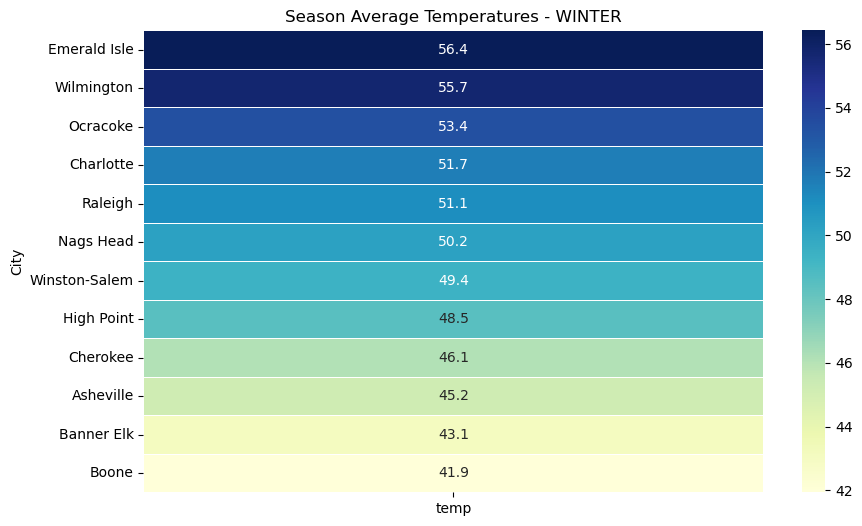

In [71]:
# Pivot the data for heatmap creation - WINTER
pivot_data = winter.pivot_table(index='City', values='temp', aggfunc='mean')

pivot_data = pivot_data.sort_values(by='temp', ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Season Average Temperatures - WINTER')
plt.show()

In [60]:
# SPRING - 2023


# Filter data by date interval - SPRING
spring_df = complete_dt_df[(complete_dt_df["datetime"] >= "2023-03-20") & (complete_dt_df["datetime"] < "2023-06-21")]
spring_df.tail()

,id,NC_ID,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,lat,lon
4181,4182,nc12,"winston-salem, nc",2023-06-16,87.1,66.8,76.3,87.2,66.8,76.3,...,30,2023-06-16T06:03:36,2023-06-16T20:39:56,0.95,Clear,Clear conditions throughout the day.,clear-day,"72207953888,AU509,72317013723,KINT,0585W,72319...",36.100357,-80.246209
4182,4183,nc12,"winston-salem, nc",2023-06-17,83.0,61.9,72.9,81.5,61.9,72.7,...,10,2023-06-17T06:03:42,2023-06-17T20:40:15,0.98,Clear,Clear conditions throughout the day.,clear-day,"72207953888,72317013723,KINT,0585W,72319393807...",36.100357,-80.246209
4183,4184,nc12,"winston-salem, nc",2023-06-18,83.9,61.0,73.7,83.2,61.0,73.5,...,10,2023-06-18T06:03:49,2023-06-18T20:40:33,0.00,Clear,Clear conditions throughout the day.,clear-day,"72207953888,72317013723,KINT,0585W,72319393807...",36.100357,-80.246209
4184,4185,nc12,"winston-salem, nc",2023-06-19,75.9,69.1,71.3,75.9,69.1,71.3,...,30,2023-06-19T06:03:58,2023-06-19T20:40:49,0.05,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"72207953888,72317013723,KINT,0585W,72319393807...",36.100357,-80.246209
4185,4186,nc12,"winston-salem, nc",2023-06-20,74.0,68.0,70.1,74.0,68.0,70.1,...,10,2023-06-20T06:04:08,2023-06-20T20:41:04,0.08,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"72207953888,72317013723,KINT,E7058,0585W,72319...",36.100357,-80.246209


In [61]:
# Group the filtered data by city names and calculate the AVERAGE of 'temp'
spring_avg_df = spring_df.groupby('NC_ID')['temp'].mean()
spring_avg_df

spring = pd.merge(spring_avg_df, coordinates, left_on="NC_ID", right_on="city_id")
spring = spring.reindex(columns=['city_id', 'City', 'temp', 'lat', 'lon'])
spring

,city_id,City,temp,lat,lon
0,nc01,Asheville,59.469892,35.592900,-82.557733
1,nc02,Banner Elk,56.669892,36.163360,-81.872085
2,nc03,Boone,55.443011,36.216749,-81.676003
3,nc04,Charlotte,65.503226,35.230328,-80.843840
4,nc05,Cherokee,60.303226,35.477081,-83.318739
5,nc06,Emerald Isle,68.165591,34.679916,-76.954833
6,nc07,High Point,63.210753,35.955408,-80.007097
7,nc08,Nags Head,63.267742,35.957688,-75.620907
8,nc09,Ocracoke,66.682796,35.113422,-75.986980
9,nc10,Raleigh,65.346237,35.782718,-78.635695


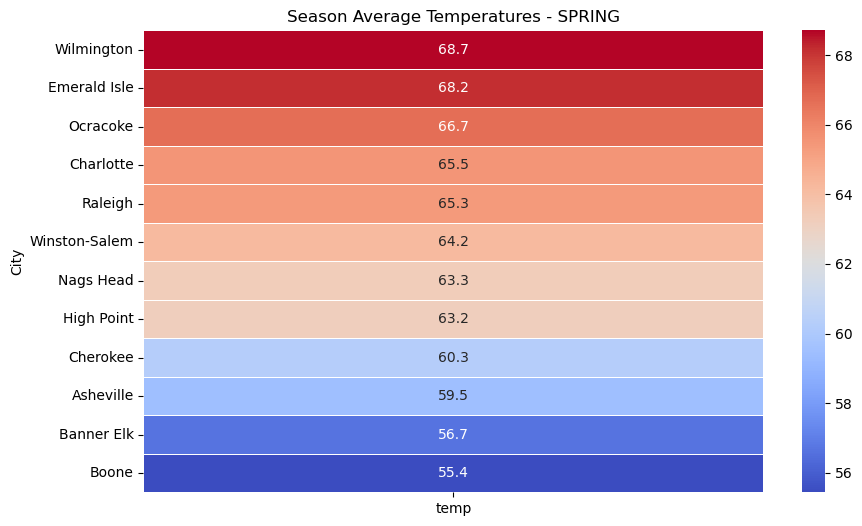

In [72]:
# Pivot the data for heatmap creation - WINTER
pivot_data = spring.pivot_table(index='City', values='temp', aggfunc='mean')

pivot_data = pivot_data.sort_values(by='temp', ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title('Season Average Temperatures - SPRING')
plt.show()

In [63]:
# SUMMER - 2023


# Filter data by date interval - SUMMER
summer_df = complete_dt_df[(complete_dt_df["datetime"] >= "2023-06-21") & (complete_dt_df["datetime"] < "2023-09-23")]
summer_df.tail()

,id,NC_ID,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,lat,lon
4275,4276,nc12,"winston-salem, nc",2023-09-18,78.2,58.9,68.2,78.2,58.9,68.2,...,10,2023-09-18T07:05:35,2023-09-18T19:24:12,0.13,"Rain, Partially cloudy",Becoming cloudy in the afternoon with morning ...,rain,"72317013723,KINT,0585W,72319393807,KGSO",36.100357,-80.246209
4276,4277,nc12,"winston-salem, nc",2023-09-19,78.2,54.0,67.1,78.2,54.0,67.1,...,10,2023-09-19T07:06:22,2023-09-19T19:22:43,0.16,Clear,Clear conditions throughout the day.,clear-day,"72317013723,KINT,0585W,72319393807,KGSO",36.100357,-80.246209
4277,4278,nc12,"winston-salem, nc",2023-09-20,80.0,61.0,69.9,80.0,61.0,69.9,...,10,2023-09-20T07:07:09,2023-09-20T19:21:13,0.20,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72207953888,72317013723,KINT,0585W,72319393807...",36.100357,-80.246209
4278,4279,nc12,"winston-salem, nc",2023-09-21,79.1,61.1,69.0,79.1,61.1,69.0,...,10,2023-09-21T07:07:56,2023-09-21T19:19:44,0.23,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72207953888,72317013723,KINT,0585W,72319393807...",36.100357,-80.246209
4279,4280,nc12,"winston-salem, nc",2023-09-22,74.0,61.0,66.4,74.0,61.0,66.4,...,10,2023-09-22T07:08:42,2023-09-22T19:18:15,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72207953888,72317013723,KINT,0585W,72319393807...",36.100357,-80.246209


In [64]:
# Group the filtered data by city names and calculate the AVERAGE of 'temp'
summer_avg_df = summer_df.groupby('NC_ID')['temp'].mean()
summer_avg_df

summer = pd.merge(summer_avg_df, coordinates, left_on="NC_ID", right_on="city_id")
summer = summer.reindex(columns=['city_id', 'City', 'temp', 'lat', 'lon'])
summer

,city_id,City,temp,lat,lon
0,nc01,Asheville,70.729787,35.592900,-82.557733
1,nc02,Banner Elk,68.669149,36.163360,-81.872085
2,nc03,Boone,67.475532,36.216749,-81.676003
3,nc04,Charlotte,77.964894,35.230328,-80.843840
4,nc05,Cherokee,71.504255,35.477081,-83.318739
5,nc06,Emerald Isle,79.520213,34.679916,-76.954833
6,nc07,High Point,75.965957,35.955408,-80.007097
7,nc08,Nags Head,78.144681,35.957688,-75.620907
8,nc09,Ocracoke,79.943617,35.113422,-75.986980
9,nc10,Raleigh,78.439362,35.782718,-78.635695


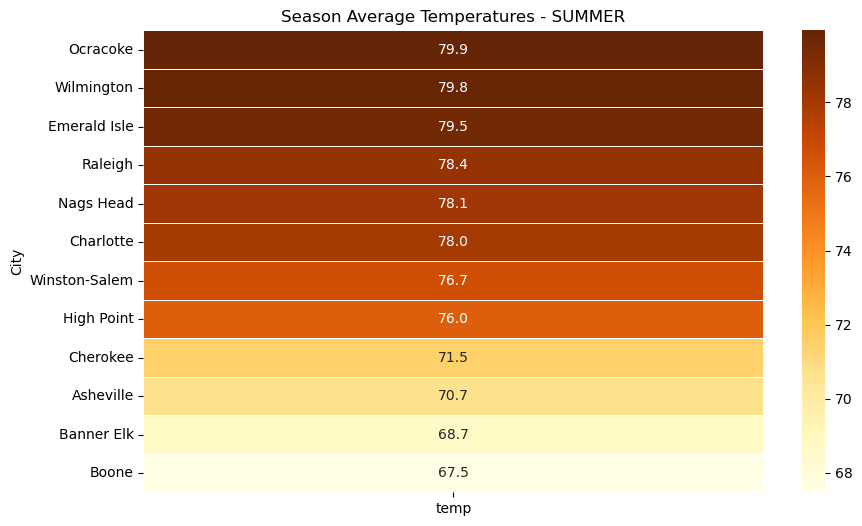

In [73]:
# Pivot the data for heatmap creation - WINTER
pivot_data = summer.pivot_table(index='City', values='temp', aggfunc='mean')

pivot_data = pivot_data.sort_values(by='temp', ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, cmap='YlOrBr', annot=True, fmt=".1f", linewidths=.5)
plt.title('Season Average Temperatures - SUMMER')
plt.show()

In [66]:
# FALL - 2023


# Filter data by date interval - FALL
fall_df = complete_dt_df[(complete_dt_df["datetime"] >= "2023-09-23") & (complete_dt_df["datetime"] < "2023-12-21")]
fall_df.tail()

,id,NC_ID,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,lat,lon
4364,4365,nc12,"winston-salem, nc",2023-12-16,56.0,33.1,44.3,56.0,30.1,43.4,...,10,2023-12-16T07:25:10,2023-12-16T17:08:00,0.13,Clear,Clear conditions throughout the day.,clear-day,"72317013723,KINT,0443W,0585W,72319393807,KGSO",36.100357,-80.246209
4365,4366,nc12,"winston-salem, nc",2023-12-17,53.0,42.1,46.5,53.0,36.7,42.4,...,10,2023-12-17T07:25:48,2023-12-17T17:08:21,0.17,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"72317013723,KINT,0443W,0585W,72319393807,KGSO",36.100357,-80.246209
4366,4367,nc12,"winston-salem, nc",2023-12-18,54.0,35.0,49.0,54.0,28.0,46.3,...,10,2023-12-18T07:26:24,2023-12-18T17:08:44,0.20,Clear,Clear conditions throughout the day.,clear-day,"72317013723,KINT,0443W,0585W,72319393807,KGSO",36.100357,-80.246209
4367,4368,nc12,"winston-salem, nc",2023-12-19,44.0,28.2,34.8,37.8,19.8,27.8,...,10,2023-12-19T07:26:59,2023-12-19T17:09:09,0.25,Clear,Clear conditions throughout the day.,clear-day,"72317013723,KINT,0585W,0443W,72319393807,KGSO",36.100357,-80.246209
4368,4369,nc12,"winston-salem, nc",2023-12-20,50.0,23.0,35.2,50.0,18.8,34.7,...,10,2023-12-20T07:27:32,2023-12-20T17:09:36,0.28,Clear,Clear conditions throughout the day.,clear-day,"72317013723,KINT,0585W,0443W,72319393807,KGSO",36.100357,-80.246209


In [67]:
# Group the filtered data by city names and calculate the AVERAGE of 'temp'
fall_avg_df = fall_df.groupby('NC_ID')['temp'].mean()
fall_avg_df

fall = pd.merge(fall_avg_df, coordinates, left_on="NC_ID", right_on="city_id")
fall = fall.reindex(columns=['city_id', 'City', 'temp', 'lat', 'lon'])
fall

,city_id,City,temp,lat,lon
0,nc01,Asheville,50.166292,35.592900,-82.557733
1,nc02,Banner Elk,47.769663,36.163360,-81.872085
2,nc03,Boone,46.710112,36.216749,-81.676003
3,nc04,Charlotte,56.437079,35.230328,-80.843840
4,nc05,Cherokee,50.562921,35.477081,-83.318739
5,nc06,Emerald Isle,59.738202,34.679916,-76.954833
6,nc07,High Point,54.019101,35.955408,-80.007097
7,nc08,Nags Head,58.495506,35.957688,-75.620907
8,nc09,Ocracoke,61.852809,35.113422,-75.986980
9,nc10,Raleigh,56.053933,35.782718,-78.635695


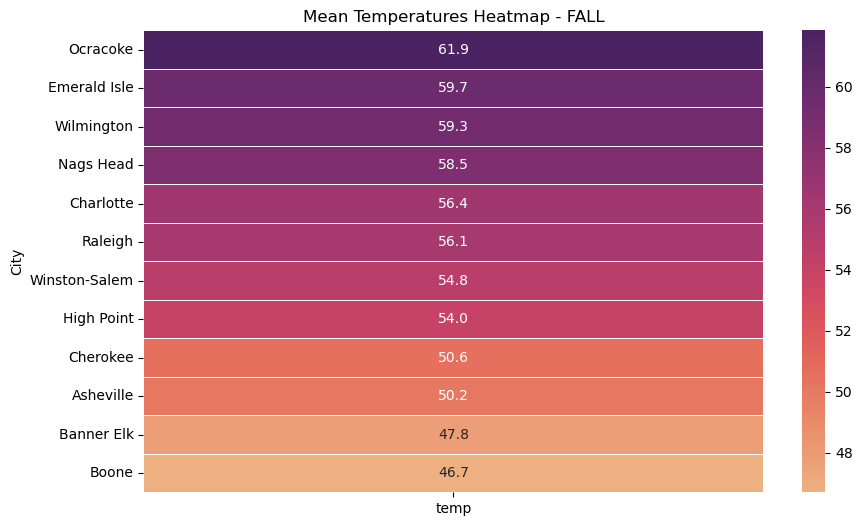

In [68]:
# Pivot the data for heatmap creation - FALL
pivot_data = fall.pivot_table(index='City', values='temp', aggfunc='mean')

pivot_data = pivot_data.sort_values(by='temp', ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, cmap='flare', annot=True, fmt=".1f", linewidths=.5)
plt.title('Mean Temperatures Heatmap - FALL')
plt.show()